# Try Horseshoe/Laplace prior
https://proceedings.mlr.press/v5/carvalho09a/carvalho09a.pdf

---- Finished running BAOAB ----
---- Finished running ZBAOABZ ----


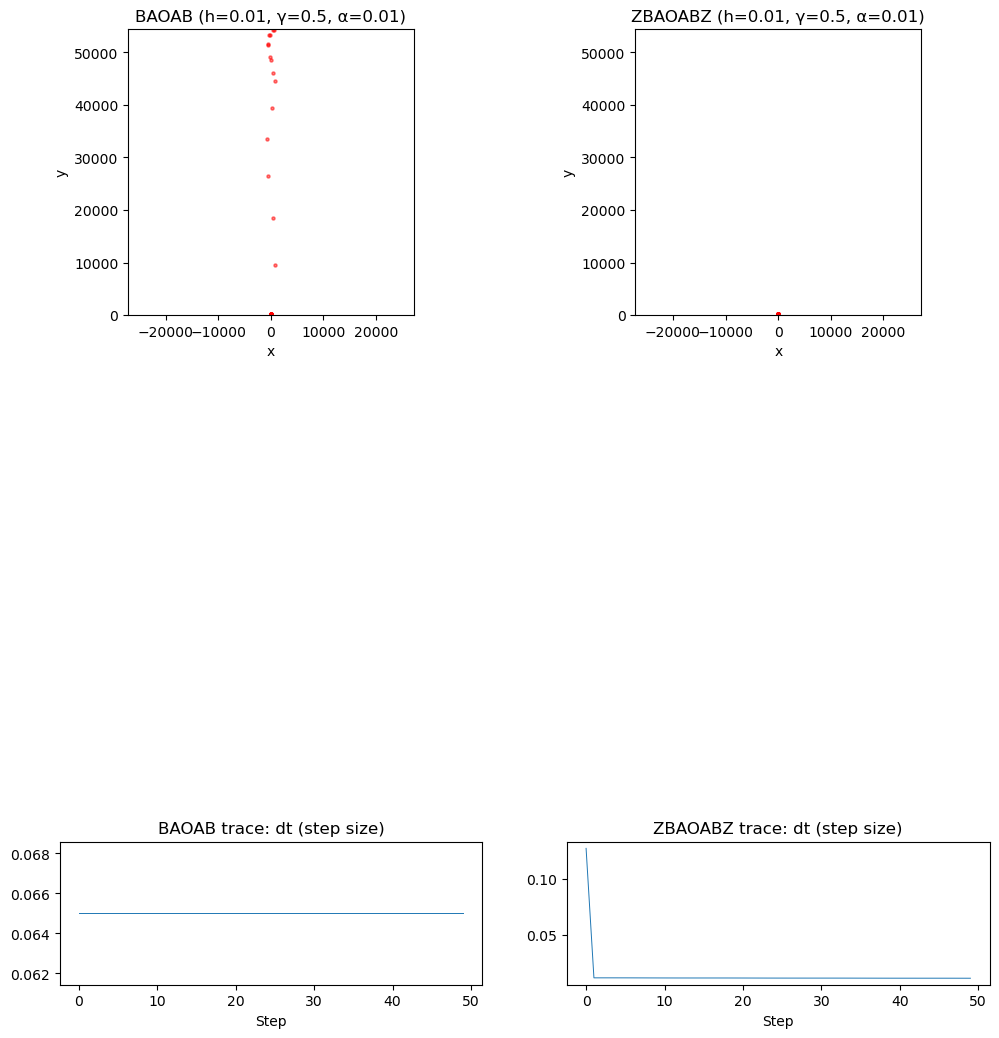

In [4]:
import numpy as np
from numba import njit
from ipywidgets import interact, FloatLogSlider
from viz import plot_samplers
import warnings
warnings.filterwarnings("ignore")
from viz import plot_samplers
from ipywidgets import fixed

# hyperparameters you can play with
y_obs = 0.0           # observed data
sigma_obs = 0.1       # observation noise (small -> tighter likelihood)
mu_s = -3.0           # prior mean for log-scale s (encourages shrinkage)
sigma_s = 1.0         # prior std for s
# z = [s, b]  (s = log scale; b = coefficient)

@njit
def grad_U(z):
    s = z[0]
    b = z[1]
    e2s = np.exp(2.0 * s)
    e_minus2s = 1.0 / e2s  # exp(-2s)
    db = (b - y_obs) / (sigma_obs**2) + b * e_minus2s
    ds = - (b*b) * e_minus2s + 1.0 + (s - mu_s) / (sigma_s**2)
    return np.array([ds, db])

@njit
def log_p(s, b):
    e2s = np.exp(2.0 * s)
    loglik = -0.5 * ((y_obs - b)**2) / (sigma_obs**2)
    logprior_b_given_s = -0.5 * (b**2) / e2s - s
    logprior_s = -0.5 * ((s - mu_s)**2) / (sigma_s**2)

    return loglik + logprior_b_given_s + logprior_s

xs = np.linspace(-500, 500, 400)
ys = np.linspace(-500, 500, 300)
X, Y = np.meshgrid(xs, ys)
LOGZ = log_p(Y, X)
vmax, vmin = LOGZ.max(), LOGZ.max() - 40
levels = np.linspace(vmin, vmax, 60)
m, M, r, s = 0.5, 50, 0.25, 2
b = 6.5 # BAOAB stepsize multiplier
burnin = int(1e1)
nsteps = int(1e2)

plot_samplers(
    alpha=0.01,
    h=0.01,
    gamma=0.5,
    beta=1.,
    grad_U=grad_U,
    X=X,
    Y=Y,
    LOGZ=LOGZ,
    levels=levels,
    m=m,
    M=M,
    r=r,
    s=s,
    b = b,
    burnin=burnin,
    nsteps=nsteps,
    record_trace=True,
    plot_stride=2)
